## Foward Price Prediction Using Transformed DF Predicting P0

In [41]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()
# Move up one directory level from EDA to the parent directory
parent_dir = os.path.dirname(current_dir)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'xdrive')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)

featureeng_path = os.path.join(parent_dir, 'Feature Engineering')
# Add the xdrive path to sys.path
sys.path.append(featureeng_path)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'Pipeline')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)
from build_a_pipeline import build_pipeline_P0_foward_price

In [42]:
from build_a_pipeline import build_pipeline_P0_foward_price
model_performance = []
# features_to_drop=10, 
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(drop_features=True, 
                                                                                features_to_drop = 5,
                                                                                target_column = 'P1',
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.01)
x_val = x_val.sort_index(ascending=True)
y_val = y_val.sort_index(ascending=True)

## Ridge with Alpha 3

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Create a Ridge regression model
ridge_model = Ridge(alpha=3)  
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')

model_performance.append({
    'Model': ridge_model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2,
    'Explained Variance Score': explained_variance
})




Mean Squared Error: 977.8290398888537
Root Mean Squared Error: 31.270258071989968
Mean Absolute Error: 28.303467636602225
R-squared: -20.922905807358433
Explained Variance Score: -3.7353310097114196


## Ridge, Low Alpha

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Create a Ridge regression model
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')

model_performance.append({
    'Model': ridge_model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2,
    'Explained Variance Score': explained_variance
})



Mean Squared Error: 455.6739297031693
Root Mean Squared Error: 21.346520318383728
Mean Absolute Error: 16.720741980609322
R-squared: -9.216199593424777
Explained Variance Score: -8.72456837439755


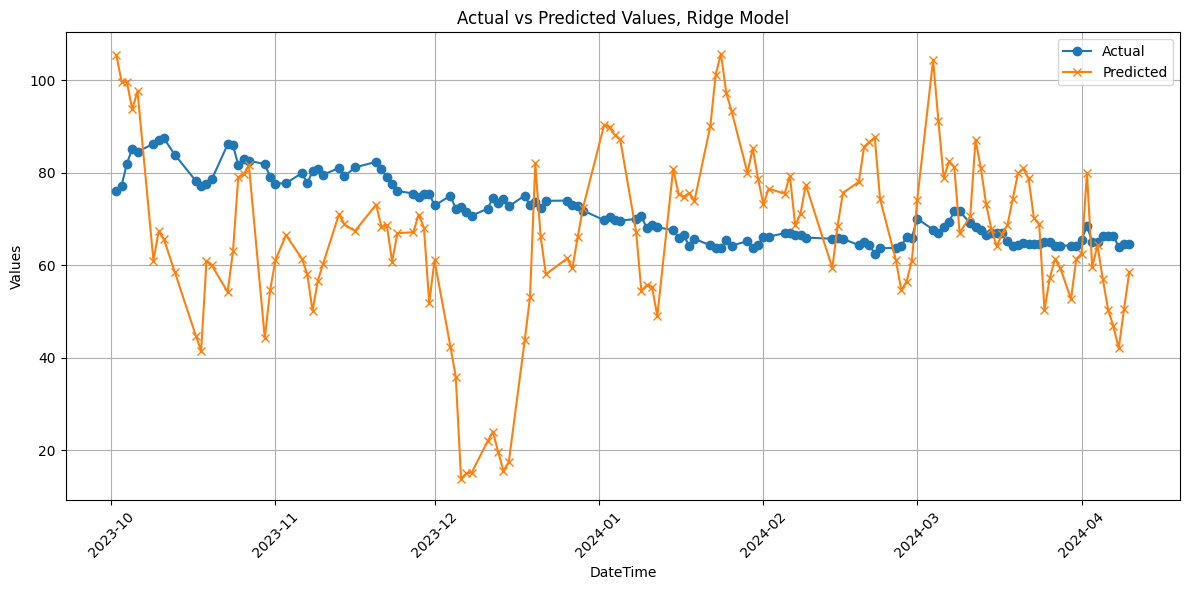

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, Ridge Model')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Lasso with Low Alpha

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
explained_variance = explained_variance_score(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')

model_performance.append({
    'Model': lasso_model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'Mean Absolute Error': mae,
    'R-squared': r2,
    'Explained Variance Score': explained_variance
})

Mean Squared Error: 407.9769068959839
Root Mean Squared Error: 20.19843822913009
Mean Absolute Error: 15.686577540083213
R-squared: -8.146833379457348
Explained Variance Score: -4.745969788929301


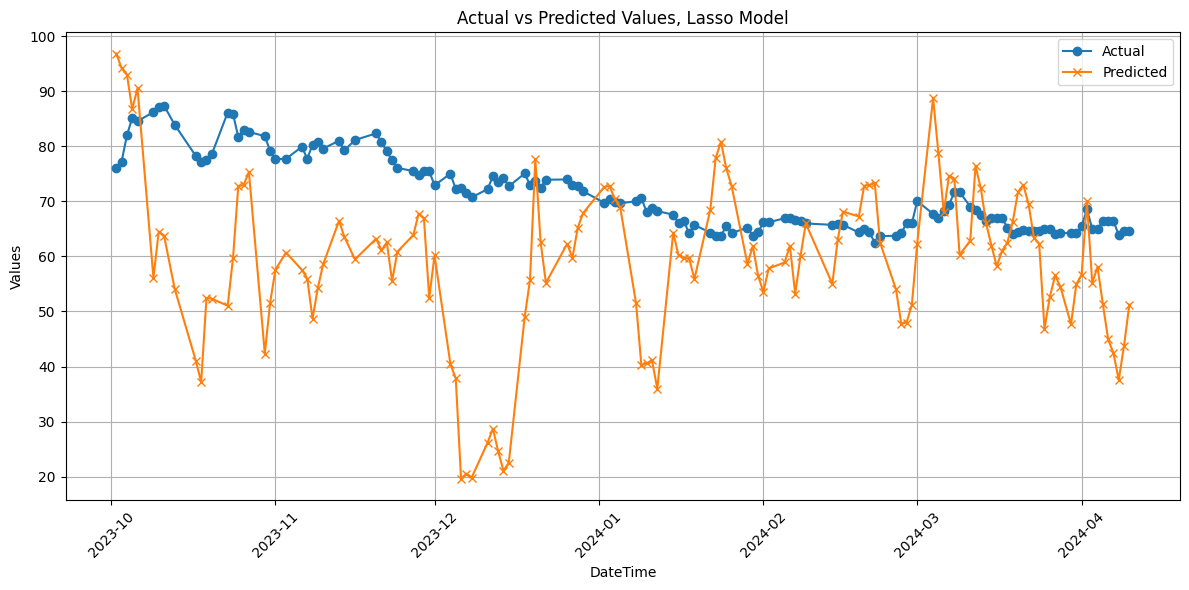

In [47]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values, Lasso Model')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Gradient Boosted

In [48]:
import xgboost as xgb
# Create XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(x_train, y_train)

# Predictions and evaluation
y_pred = model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Predictions on validation data
y_pred = model.predict(x_val)
from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

model_performance.append({
    'Model': model,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
})

Mean Squared Error: 34.7633821981282
Root Mean Squared Error: 5.896048015249553
Mean Squared Error: 34.7633821981282
Root Mean Squared Error: 5.896048015249553
R-squared: 0.22060572719195148


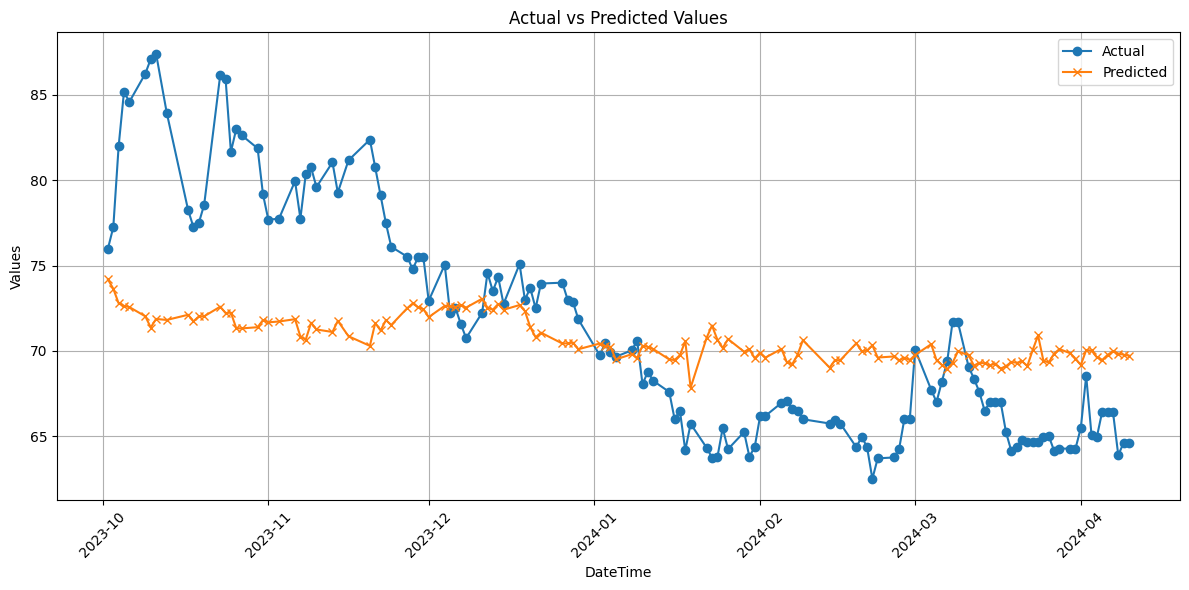

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(x_val.index, y_val, label='Actual', marker='o')
plt.plot(x_val.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [50]:
performance_df = pd.DataFrame(model_performance)
performance_df = performance_df.sort_values(by='Mean Squared Error', ascending=True)
performance_df

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R-squared,Explained Variance Score
3,"XGBRegressor(base_score=None, booster=None, ca...",34.763382,5.896048,NaN,0.220606,NaN
2,Lasso(alpha=0.1),407.976907,20.198438,15.686578,-8.146833,-4.745970
1,Ridge(alpha=0.1),455.673930,21.346520,16.720742,-9.216200,-8.724568
0,Ridge(alpha=3),977.829040,31.270258,28.303468,-20.922906,-3.735331
